In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers.core import Dense, Dropout, Activation, Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# paths to train and test data
train_data_dir = 'C:/Users/miche/homework_5/DITS-classification/DITS-classification/classification train'
test_data_dir = 'C:/Users/miche/homework_5/DITS-classification/DITS-classification/classification test'

In [3]:
# creating generators
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        zoom_range=0.2,
        shear_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [4]:
train_batch_size, test_batch_size = 7489, 1159
train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=train_batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42)

test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=test_batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 7489 images belonging to 59 classes.
Found 1159 images belonging to 59 classes.


In [5]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

Y_train = np.empty(len(y_train), dtype=int)
Y_test = np.empty(len(y_test), dtype=int)

for i in range(len(y_train)):
    Y_train[i] = (np.where(y_train[i]==1)[0][0])
for j in range(len(y_test)):
    Y_test[j] = (np.where(y_test[j]==1)[0][0])

stampa = X_test

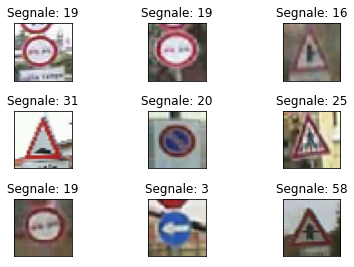

In [6]:
# plotting some samples
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i])
    plt.title("Segnale: {}".format(Y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [7]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (7489, 32, 32, 3)
y_train shape (7489, 59)
X_test shape (1159, 32, 32, 3)
y_test shape (1159, 59)


In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(59, activation='sigmoid'))

In [9]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [10]:
# training the model and saving metrics in history
history = model.fit(X_train, y_train,
          batch_size=100, epochs=30,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 7489 samples, validate on 1159 samples
Epoch 1/30
 - 5s - loss: 3.5330 - accuracy: 0.0816 - val_loss: 3.4023 - val_accuracy: 0.0613
Epoch 2/30
 - 2s - loss: 2.7615 - accuracy: 0.1861 - val_loss: 2.8915 - val_accuracy: 0.2330
Epoch 3/30
 - 2s - loss: 1.6204 - accuracy: 0.5081 - val_loss: 2.5546 - val_accuracy: 0.4513
Epoch 4/30
 - 2s - loss: 0.8415 - accuracy: 0.7367 - val_loss: 2.5922 - val_accuracy: 0.4538
Epoch 5/30
 - 2s - loss: 0.4883 - accuracy: 0.8494 - val_loss: 2.2977 - val_accuracy: 0.5280
Epoch 6/30
 - 3s - loss: 0.3154 - accuracy: 0.8977 - val_loss: 2.4701 - val_accuracy: 0.5557
Epoch 7/30
 - 2s - loss: 0.2177 - accuracy: 0.9306 - val_loss: 2.2464 - val_accuracy: 0.5884
Epoch 8/30
 - 2s - loss: 0.1451 - accuracy: 0.9533 - val_loss: 2.4566 - val_accuracy: 0.5893
Epoch 9/30
 - 2s - loss: 0.1147 - accuracy: 0.9643 - val_loss: 2.4607 - val_accuracy: 0.5686
Epoch 10/30
 - 2s - loss: 0.0807 - accuracy: 0.9761 - val_loss: 2.6031 - val_accuracy: 0.6040
Epoch 11/30
 - 3s - l

In [11]:
# saving the model
save_dir = "C:/Users/miche/homework_5/results/"
model_name = 'signal_recognition.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:/Users/miche/homework_5/results/signal_recognition.h5 


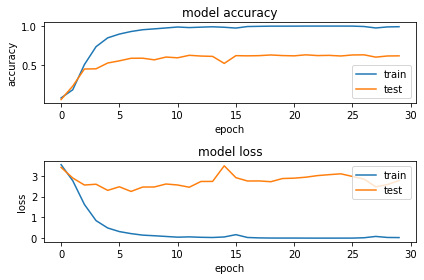

In [12]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [13]:
model = load_model("C:/Users/miche/homework_5/results/signal_recognition.h5")
loss_and_metrics = model.evaluate(X_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 2.77172868862761
Test Accuracy 0.6194995641708374


In [14]:
# load the model and create predictions on the test set
model = load_model("C:/Users/miche/homework_5/results/signal_recognition.h5")
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


718  classified correctly
441  classified incorrectly


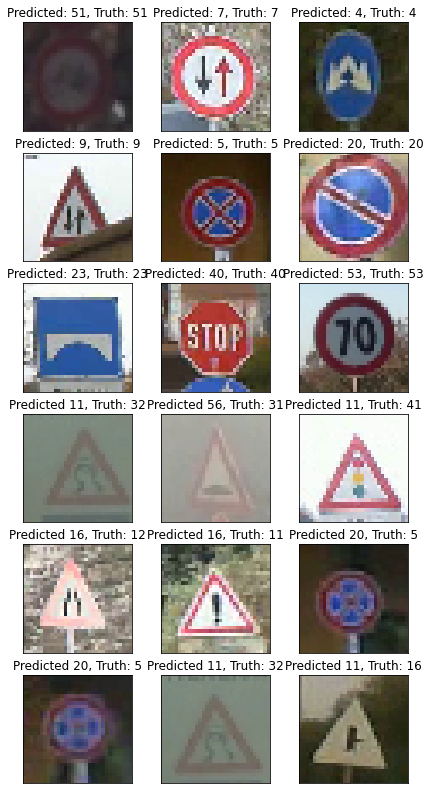

In [15]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(stampa[correct], interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(stampa[incorrect], interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])